<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی مصرف برق</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این سوال قصد داریم با استفاده از یک مجموعه‌داده که شامل اطلاعات منازل است، میزان مصرف برق ماهانه آن را پیش‌بینی کنیم. برای این‌کار شما باید پس از پیش‌پردازش داده‌ها، به مهندسی ویژگی و ساخت مدل مناسب بپردازید. توجه داشته باشید، در انتها، تنها مدل شما مورد بررسی قرار خواهد گرفت، اما مسلماً هرچه پیش‌پردازش و مهندسی ویژگی بهتری داشته باشید در نهایت به مدل بهتری خواهید رسید.

</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در فایل اولیه‌ی این سوال یک پوشه با نام <code>data</code> قرار دارد.
    این پوشه شامل دو فایل با نام‌های <code>train.csv</code> و <code>test.csv</code> است که به‌ترتیب مجموعه‌داده‌ی آموزش و آزمون هستند.
    مجموعه‌داده‌ی آموزش این سوال شامل ۹۶۴ سطر و ۶ ستون است و
        مجموعه‌داده‌ی آزمون دارای ۵۲۴ سطر است و تنها ستون <code>electricity_consumption_kWh</code> را که ویژگی هدف است، ندارد.
    توضیحات مربوط به ستون‌ها به شرح زیر است:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>نام ویژگی</b> | <b>توضیح ویژگی</b> |
| :---: | :---: |
| <code>house_size_m2</code> | متراژ خانه (مترمربع)|
| <code>num_residents</code> | تعداد ساکنان خانه|
| <code>avg_daily_temp</code> | میانگین دمای روزانه (درجه سلسیوس)|
| <code>heating_cooling</code> |استفاده از وسایل گرمایشی یا سرمایشی (0 = نه، 1 = بله)|
| <code>high_power_appliances</code> |تعداد وسایل برقی پرمصرف (مثل کولر، ماشین لباسشویی، ظرفشویی)|
| <code>electricity_consumption_kWh</code> | میزان مصرف برق ماهانه (کیلووات ساعت)|

</font>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید مقدار متغیر هدف آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزش را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Reading/Loading the dataset files
train = pd.read_csv('/content/drive/MyDrive/Quera/2-initial/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Quera/2-initial/data/test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (964, 6)
Test shape: (524, 5)


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
        در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی دلخواهتان، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.

</font>
</p>

# Preprocessing step

In [3]:
train.head(7)

,house_size_m2,num_residents,avg_daily_temp,heating_cooling,high_power_appliances,electricity_consumption_kWh
0,84.71,4,10.13,0,3,363.09
1,93.49,5,33.69,0,1,335.08
2,65.85,5,24.46,1,2,293.37
3,156.18,3,25.56,1,2,310.20
4,80.37,3,19.19,1,1,267.01
5,134.43,4,31.93,0,2,284.58
6,86.72,5,21.99,0,0,211.83


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   house_size_m2                964 non-null    float64
 1   num_residents                964 non-null    int64  
 2   avg_daily_temp               964 non-null    float64
 3   heating_cooling              964 non-null    int64  
 4   high_power_appliances        964 non-null    int64  
 5   electricity_consumption_kWh  964 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 45.3 KB


In [5]:
train.describe()

,house_size_m2,num_residents,avg_daily_temp,heating_cooling,high_power_appliances,electricity_consumption_kWh
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,106.139046,3.514523,22.089876,0.519710,1.495851,277.866660
std,36.996513,1.704187,7.343896,0.499871,1.133362,51.980652
min,40.080000,1.000000,10.030000,0.000000,0.000000,126.540000
25%,75.435000,2.000000,15.550000,0.000000,0.000000,243.440000
50%,106.775000,4.000000,21.640000,1.000000,1.000000,277.705000
75%,138.287500,5.000000,28.270000,1.000000,3.000000,315.810000
max,169.890000,6.000000,35.000000,1.000000,3.000000,432.030000


In [6]:
train.isnull().sum()

,0
house_size_m2,0
num_residents,0
avg_daily_temp,0
heating_cooling,0
high_power_appliances,0
electricity_consumption_kWh,0


In [15]:
df = train.copy()

correlation_matrix = train.corr(numeric_only=True)

group_by_heating = train.groupby("heating_cooling")["electricity_consumption_kWh"].agg(["mean", "count", "std"])
group_by_appliances = train.groupby("high_power_appliances")["electricity_consumption_kWh"].agg(["mean", "count", "std"])

# Detecting outliers using z-score
from scipy.stats import zscore
train["z_score"] = zscore(train["electricity_consumption_kWh"])
outliers = train[train["z_score"].abs() > 3][["electricity_consumption_kWh", "z_score"]]

# Display results
print("\n=== Grouped by Heating/Cooling ===")
print(group_by_heating)
print("\n=== Grouped by High Power Appliances ===")
print(group_by_appliances)
print("\n=== Outliers (Z-score > 3 or < -3) ===")
print(outliers)


=== Grouped by Heating/Cooling ===
                       mean  count        std
heating_cooling                              
0                268.537214    463  53.353858
1                286.488483    501  49.179843

=== Grouped by High Power Appliances ===
                             mean  count        std
high_power_appliances                              
0                      229.357172    244  38.128194
1                      262.661587    252  37.492930
2                      297.053224    214  37.721080
3                      323.386614    254  37.475900

=== Outliers (Z-score > 3 or < -3) ===
Empty DataFrame
Columns: [electricity_consumption_kWh, z_score]
Index: []


# Heatmap: Correlation Between Features

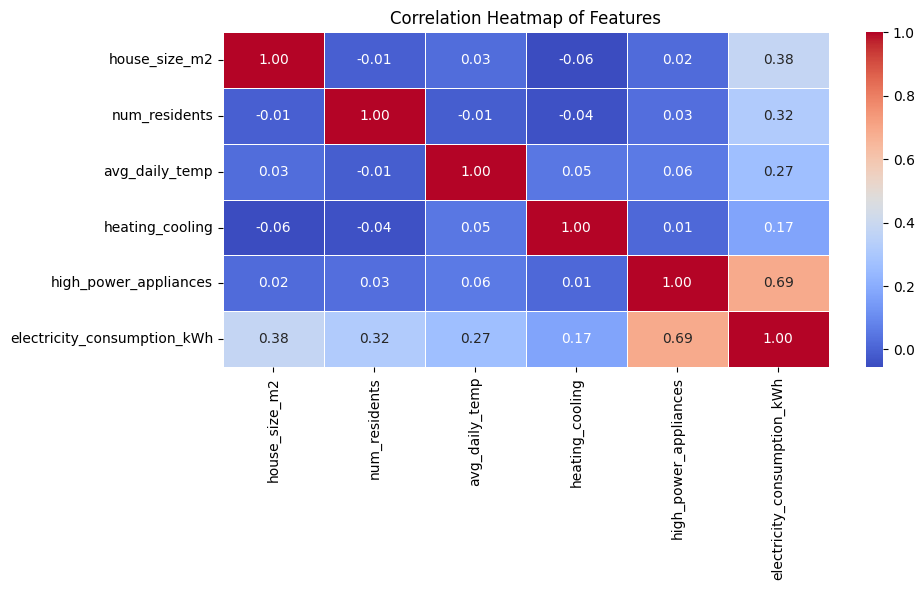

In [16]:
import seaborn as sns

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

# Histogram: Distribution of Each Feature

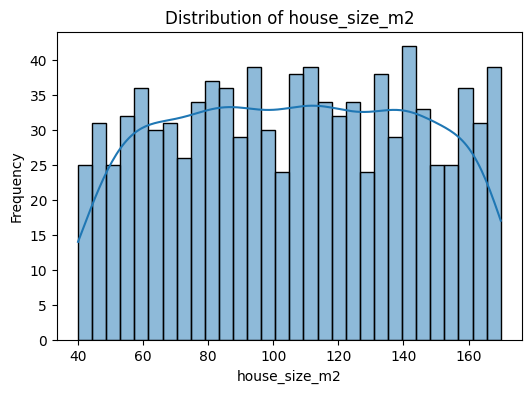

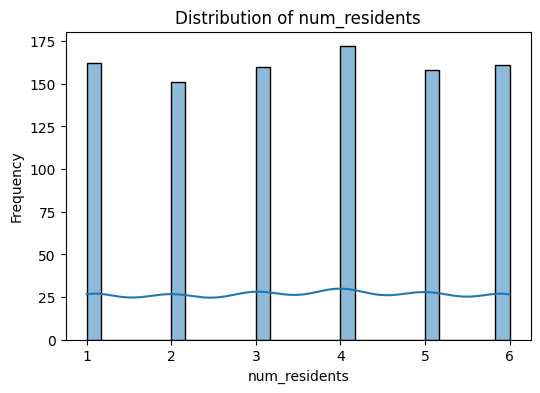

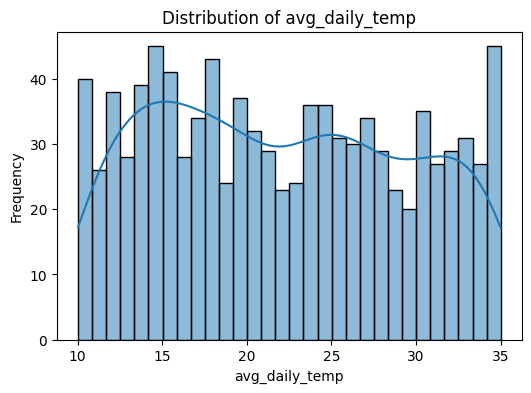

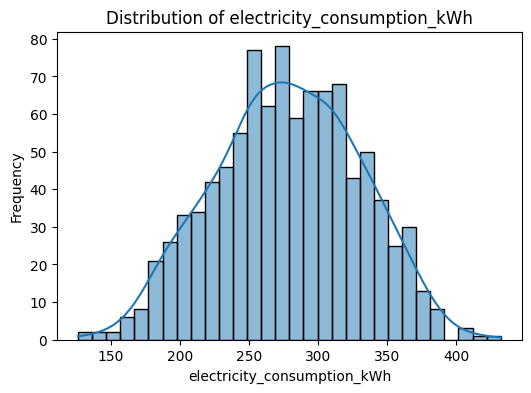

In [9]:
features = ['house_size_m2', 'num_residents', 'avg_daily_temp', 'electricity_consumption_kWh']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(train[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


# Detecting Outliers in Electricity Consumption

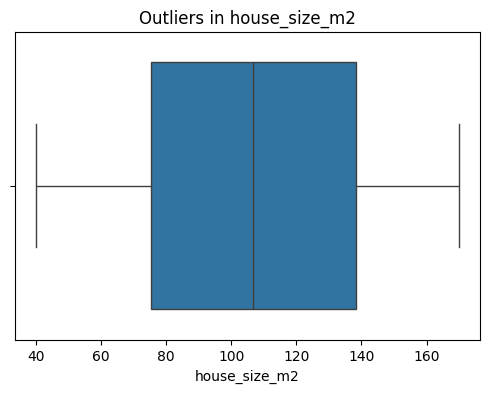

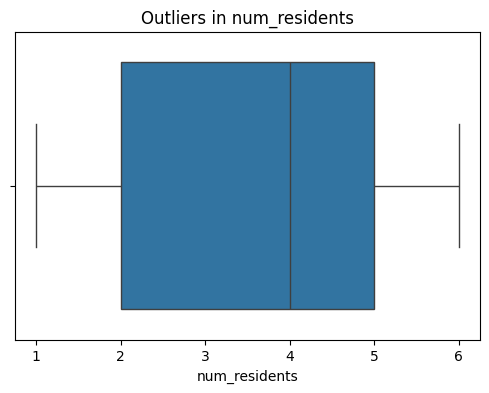

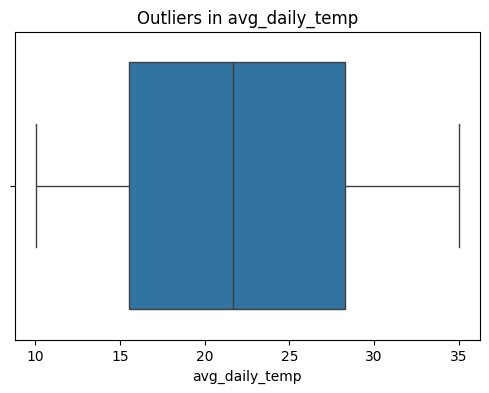

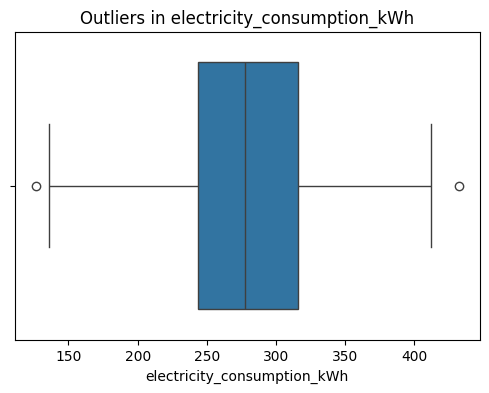

In [10]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train[feature])
    plt.title(f'Outliers in {feature}')
    plt.show()

# Impact of Heating/Cooling Systems on Electricity Consumption

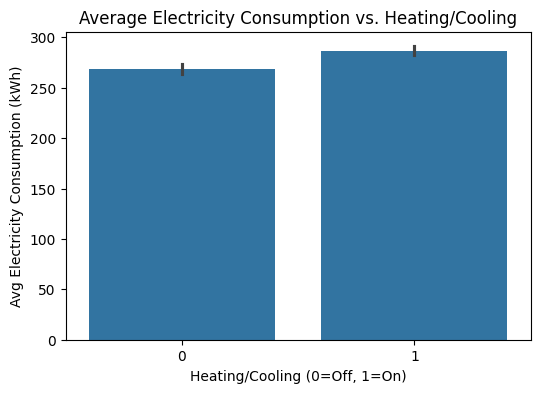

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x='heating_cooling', y='electricity_consumption_kWh', data=train)
plt.title('Average Electricity Consumption vs. Heating/Cooling')
plt.xlabel('Heating/Cooling (0=Off, 1=On)')
plt.ylabel('Avg Electricity Consumption (kWh)')
plt.show()

# Relationship Between House Size and Electricity Consumption

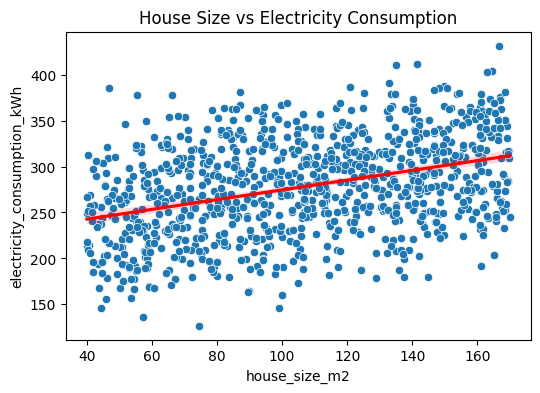

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='house_size_m2', y='electricity_consumption_kWh', data=train)
sns.regplot(x='house_size_m2', y='electricity_consumption_kWh', data=train, scatter=False, color='red')
plt.title('House Size vs Electricity Consumption')
plt.show()


# Smart Feature Engineering to Understand Electricity Usage Better

In [17]:
df_fe = df.copy()

# تراکم افراد در خانه
df_fe["residents_per_m2"] = df_fe["num_residents"] / df_fe["house_size_m2"]

# دمای پایین و بالا (مصرف انرژی برای گرمایش/سرمایش)
df_fe["low_temp"] = df_fe["avg_daily_temp"].apply(lambda x: max(0, 18 - x))  # زیر 18 احتمالا نیاز به گرمایش
df_fe["high_temp"] = df_fe["avg_daily_temp"].apply(lambda x: max(0, x - 24))  # بالای 24 نیاز به سرمایش

# شاخص مصرف بالقوه: ترکیب وسایل پرمصرف و گرمایش/سرمایش
df_fe["power_appliance_heating_cooling"] = df_fe["high_power_appliances"] * df_fe["heating_cooling"]

# اثر ترکیبی متراژ و وسایل پرمصرف
df_fe["area_appliance_product"] = df_fe["house_size_m2"] * df_fe["high_power_appliances"]

# تعامل بین تعداد ساکن و دما
df_fe["residents_temp_interaction"] = df_fe["num_residents"] * df_fe["avg_daily_temp"]

# تعداد وسایل پرمصرف به ازای هر ساکن
df_fe["appliance_per_resident"] = df_fe["high_power_appliances"] / df_fe["num_residents"]

# normalized_consumption (مصرف به ازای هر نفر یا هر متر)
df_fe["consumption_per_resident"] = df_fe["electricity_consumption_kWh"] / df_fe["num_residents"]
df_fe["consumption_per_m2"] = df_fe["electricity_consumption_kWh"] / df_fe["house_size_m2"]

# شاخصی که اختلاف دما با بازه‌ی راحتی رو اندازه بگیره.
df_fe["comfort_index"] = df_fe["avg_daily_temp"].apply(lambda x: abs(x - 21))

# میزان بار انرژی گرمایی + سرمایی
df_fe["combined_temp_load"] = df_fe["low_temp"] + df_fe["high_temp"]

df_fe.head()

,house_size_m2,num_residents,avg_daily_temp,heating_cooling,high_power_appliances,electricity_consumption_kWh,residents_per_m2,low_temp,high_temp,power_appliance_heating_cooling,area_appliance_product,residents_temp_interaction,appliance_per_resident,consumption_per_resident,consumption_per_m2,comfort_index,combined_temp_load
0,84.71,4,10.13,0,3,363.09,0.047220,7.87,0.00,0,254.13,40.52,0.750000,90.772500,4.286271,10.87,7.87
1,93.49,5,33.69,0,1,335.08,0.053482,0.00,9.69,0,93.49,168.45,0.200000,67.016000,3.584127,12.69,9.69
2,65.85,5,24.46,1,2,293.37,0.075930,0.00,0.46,2,131.70,122.30,0.400000,58.674000,4.455125,3.46,0.46
3,156.18,3,25.56,1,2,310.20,0.019209,0.00,1.56,2,312.36,76.68,0.666667,103.400000,1.986170,4.56,1.56
4,80.37,3,19.19,1,1,267.01,0.037327,0.00,0.00,1,80.37,57.57,0.333333,89.003333,3.322260,1.81,0.00


In [18]:
df_fe.describe()

,house_size_m2,num_residents,avg_daily_temp,heating_cooling,high_power_appliances,electricity_consumption_kWh,residents_per_m2,low_temp,high_temp,power_appliance_heating_cooling,area_appliance_product,residents_temp_interaction,appliance_per_resident,consumption_per_resident,consumption_per_m2,comfort_index,combined_temp_load
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,106.139046,3.514523,22.089876,0.519710,1.495851,277.866660,0.038474,1.400166,2.323786,0.784232,159.682023,77.462521,0.597770,108.920410,2.948213,6.399979,3.723952
std,36.996513,1.704187,7.343896,0.499871,1.133362,51.980652,0.026119,2.331259,3.498869,1.102777,138.731642,46.815473,0.691681,74.154756,1.159361,3.757606,3.341066
min,40.080000,1.000000,10.030000,0.000000,0.000000,126.540000,0.005928,0.000000,0.000000,0.000000,0.000000,10.070000,0.000000,29.233333,1.191520,0.010000,0.000000
25%,75.435000,2.000000,15.550000,0.000000,0.000000,243.440000,0.019195,0.000000,0.000000,0.000000,0.000000,37.785000,0.000000,58.060583,2.112103,3.270000,0.270000
50%,106.775000,4.000000,21.640000,1.000000,1.000000,277.705000,0.033655,0.000000,0.000000,0.000000,137.210000,69.460000,0.400000,79.191667,2.614337,6.210000,3.210000
75%,138.287500,5.000000,28.270000,1.000000,3.000000,315.810000,0.049875,2.450000,4.270000,2.000000,258.547500,107.300000,0.750000,125.501250,3.537773,9.412500,6.412500
max,169.890000,6.000000,35.000000,1.000000,3.000000,432.030000,0.149701,7.970000,11.000000,3.000000,506.520000,209.700000,3.000000,364.610000,8.247971,14.000000,11.000000


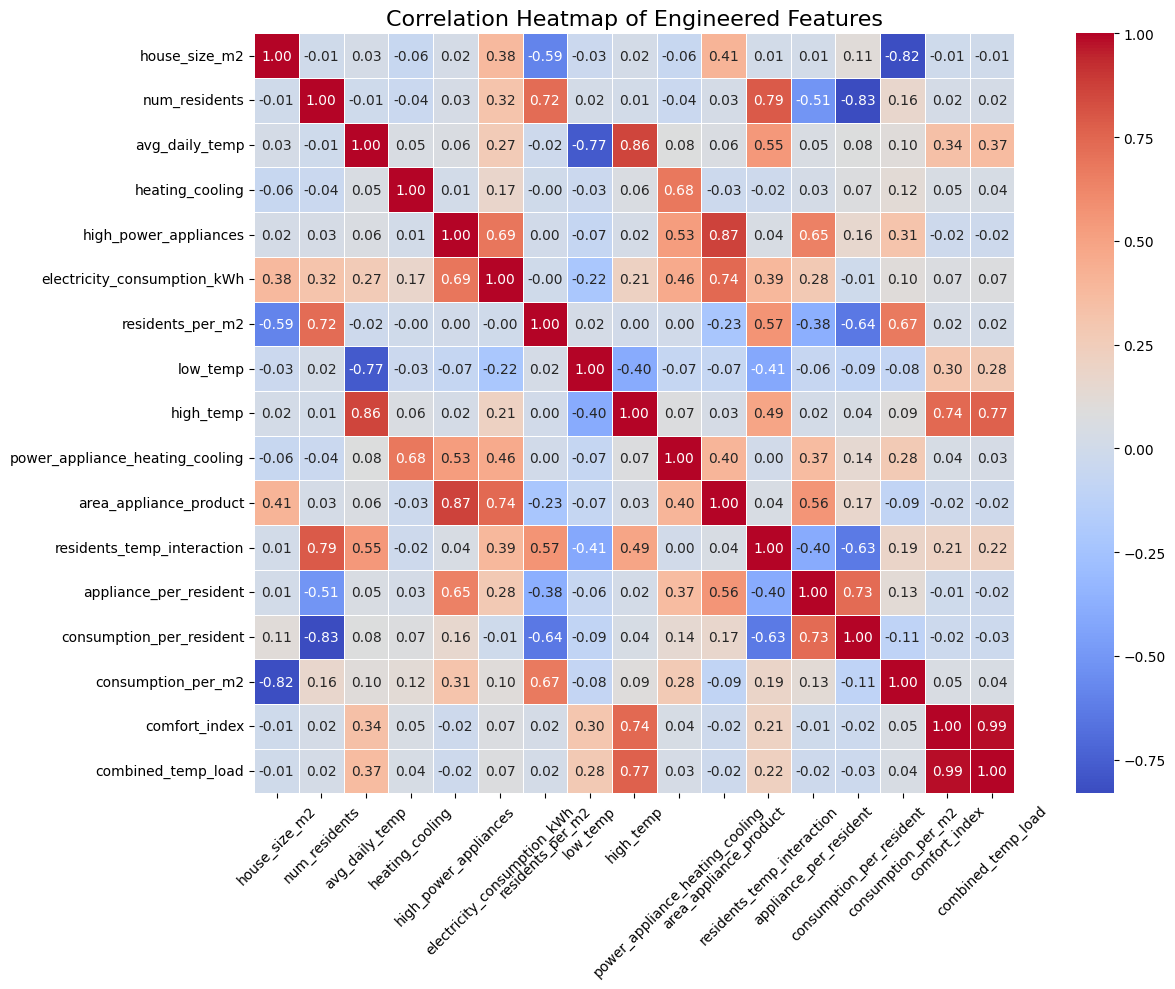

In [19]:
correlation_matrix = df_fe.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Engineered Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [20]:
correlation_threshold = 0.9

corr_matrix = df_fe.corr().abs()

# Create a mask to ignore self-correlations (diagonal)
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
filtered_corr = corr_matrix.where(mask)

# Find pairs of features with high correlation
highly_correlated_pairs = (
    filtered_corr.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature_1", "level_1": "Feature_2", 0: "Correlation"})
)

# Filter those above the threshold
high_corr_features = highly_correlated_pairs[highly_correlated_pairs["Correlation"] > correlation_threshold]
high_corr_features

,Feature_1,Feature_2,Correlation
135,comfort_index,combined_temp_load,0.985346


In [22]:
df_fe.drop(columns="combined_temp_load", axis=1, inplace=True)
df_fe

,house_size_m2,num_residents,avg_daily_temp,heating_cooling,high_power_appliances,electricity_consumption_kWh,residents_per_m2,low_temp,high_temp,power_appliance_heating_cooling,area_appliance_product,residents_temp_interaction,appliance_per_resident,consumption_per_resident,consumption_per_m2,comfort_index
0,84.71,4,10.13,0,3,363.09,0.047220,7.87,0.00,0,254.13,40.52,0.750000,90.772500,4.286271,10.87
1,93.49,5,33.69,0,1,335.08,0.053482,0.00,9.69,0,93.49,168.45,0.200000,67.016000,3.584127,12.69
2,65.85,5,24.46,1,2,293.37,0.075930,0.00,0.46,2,131.70,122.30,0.400000,58.674000,4.455125,3.46
3,156.18,3,25.56,1,2,310.20,0.019209,0.00,1.56,2,312.36,76.68,0.666667,103.400000,1.986170,4.56
4,80.37,3,19.19,1,1,267.01,0.037327,0.00,0.00,1,80.37,57.57,0.333333,89.003333,3.322260,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,115.41,2,28.75,0,2,297.04,0.017330,0.00,4.75,0,230.82,57.50,1.000000,148.520000,2.573780,7.75
960,122.14,6,17.55,1,1,288.37,0.049124,0.45,0.00,1,122.14,105.30,0.166667,48.061667,2.360979,3.45
961,145.75,3,20.02,0,0,277.75,0.020583,0.00,0.00,0,0.00,60.06,0.000000,92.583333,1.905660,0.98
962,80.48,6,22.85,0,3,289.52,0.074553,0.00,0.00,0,241.44,137.10,0.500000,48.253333,3.597416,1.85


In [37]:
df_fe.shape

(964, 16)

In [27]:
# Calculate correlation of features with target
correlation_with_target = df_fe.corr()["electricity_consumption_kWh"].drop("electricity_consumption_kWh")
correlation_with_target_sorted = correlation_with_target.sort_values()

# Filter features with very low correlation (absolute correlation < 0.1)
low_correlation_features = correlation_with_target_sorted[correlation_with_target_sorted.abs() < 0.1]

# Print results
print("All feature correlations with electricity consumption:\n")
print(correlation_with_target_sorted)

print("\n🔍 Features with very low correlation to target (|corr| < 0.1):\n")
print(low_correlation_features)


All feature correlations with electricity consumption:

low_temp                          -0.220415
consumption_per_resident          -0.013443
residents_per_m2                  -0.004542
comfort_index                      0.067480
consumption_per_m2                 0.100918
heating_cooling                    0.172628
high_temp                          0.214740
avg_daily_temp                     0.265719
appliance_per_resident             0.278653
num_residents                      0.317915
house_size_m2                      0.378828
residents_temp_interaction         0.389457
power_appliance_heating_cooling    0.456427
high_power_appliances              0.688599
area_appliance_product             0.739013
Name: electricity_consumption_kWh, dtype: float64

🔍 Features with very low correlation to target (|corr| < 0.1):

consumption_per_resident   -0.013443
residents_per_m2           -0.004542
comfort_index               0.067480
Name: electricity_consumption_kWh, dtype: float64


In [28]:
# 1. دیتافریم کامل با تمام فیچرها
df_full = df_fe.copy()

# 2. محاسبه همبستگی فیچرها با تارگت
target_corr = df_fe.corr()["electricity_consumption_kWh"].drop("electricity_consumption_kWh")

# 3. انتخاب فقط فیچرهایی با |corr| >= 0.1
selected_features = target_corr[abs(target_corr) >= 0.1].index.tolist()

# 4. ساخت دیتافریم بدون فیچرهای کم‌ربط
df_reduced = df_fe[selected_features + ["electricity_consumption_kWh"]]  # اضافه کردن target

# نمایش شکل دیتاست‌ها برای بررسی
print("✅ df_full shape:", df_full.shape)
print("✅ df_reduced shape:", df_reduced.shape)


✅ df_full shape: (964, 16)
✅ df_reduced shape: (964, 13)


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
</font>
</p>

In [29]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# فرض: df_fe، df_reduced آماده هستن

X = df_reduced.drop(columns=["electricity_consumption_kWh"])
y = df_reduced["electricity_consumption_kWh"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "LinearRegression": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", LinearRegression())
        ]),
        "params": {}
    },
    "DecisionTree": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", DecisionTreeRegressor(random_state=42))
        ]),
        "params": {
            "regressor__max_depth": [3, 5, 10],
            "regressor__min_samples_split": [2, 5, 10]
        }
    },
    "RandomForest": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", RandomForestRegressor(random_state=42))
        ]),
        "params": {
            "regressor__n_estimators": [50, 100],
            "regressor__max_depth": [None, 5, 10]
        }
    },
    "XGBoost": {
        "model": Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", XGBRegressor(random_state=42, verbosity=0))
        ]),
        "params": {
            "regressor__n_estimators": [50, 100],
            "regressor__max_depth": [3, 6, 10],
            "regressor__learning_rate": [0.01, 0.1]
        }
    }
}

results = []

for model_name, model_info in models.items():
    print(f"\nTraining: {model_name}")
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X)

    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    results.append({
        "Model": model_name,
        "Best Params": grid_search.best_params_,
        "MSE": mse,
        "R2 Score": r2
    })

# نمایش نتایج
results_df = pd.DataFrame(results)
print("\n📊 Final Model Comparison Results:")
print(results_df)



Training: LinearRegression

Training: DecisionTree

Training: RandomForest

Training: XGBoost

📊 Final Model Comparison Results:
              Model                                        Best Params  \
0  LinearRegression                                                 {}   
1      DecisionTree  {'regressor__max_depth': 10, 'regressor__min_s...   
2      RandomForest  {'regressor__max_depth': None, 'regressor__n_e...   
3           XGBoost  {'regressor__learning_rate': 0.1, 'regressor__...   

          MSE  R2 Score  
0  418.866406  0.844817  
1  170.693828  0.936761  
2   50.043390  0.981460  
3    6.214277  0.997698  


In [30]:
# Features and target for full dataset
X_full = df_full.drop(columns=["electricity_consumption_kWh"])
y_full = df_full["electricity_consumption_kWh"]

# مدل‌ها همون قبلی هستن (models)
results_full = []

for model_name, model_info in models.items():
    print(f"\nTraining on df_full: {model_name}")
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=kf,
                               scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_full, y_full)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_full)

    mse = mean_squared_error(y_full, y_pred)
    r2 = r2_score(y_full, y_pred)

    results_full.append({
        "Model": model_name,
        "Best Params": grid_search.best_params_,
        "MSE": mse,
        "R2 Score": r2
    })

results_full_df = pd.DataFrame(results_full)
print("\n📊 Results on df_full:")
print(results_full_df)



Training on df_full: LinearRegression

Training on df_full: DecisionTree

Training on df_full: RandomForest

Training on df_full: XGBoost

📊 Results on df_full:
              Model                                        Best Params  \
0  LinearRegression                                                 {}   
1      DecisionTree  {'regressor__max_depth': 10, 'regressor__min_s...   
2      RandomForest  {'regressor__max_depth': None, 'regressor__n_e...   
3           XGBoost  {'regressor__learning_rate': 0.1, 'regressor__...   

          MSE  R2 Score  
0  288.328105  0.893180  
1  159.465820  0.940921  
2   38.451948  0.985754  
3    4.355760  0.998386  


In [35]:
# ساخت کپی از دیتای خام تست
test_fe = test.copy()

# اعمال دقیقاً همون ویژگی‌هایی که روی train ایجاد کردی:
test_fe["residents_per_m2"] = test_fe["num_residents"] / test_fe["house_size_m2"]
test_fe["low_temp"] = test_fe["avg_daily_temp"].apply(lambda x: max(0, 18 - x))
test_fe["high_temp"] = test_fe["avg_daily_temp"].apply(lambda x: max(0, x - 24))
test_fe["power_appliance_heating_cooling"] = test_fe["high_power_appliances"] * test_fe["heating_cooling"]
test_fe["area_appliance_product"] = test_fe["house_size_m2"] * test_fe["high_power_appliances"]
test_fe["residents_temp_interaction"] = test_fe["num_residents"] * test_fe["avg_daily_temp"]
test_fe["appliance_per_resident"] = test_fe["high_power_appliances"] / test_fe["num_residents"]
test_fe["consumption_per_resident"] = np.nan  # چون نداریم، مقدار null می‌ذاریم
test_fe["consumption_per_m2"] = np.nan
test_fe["comfort_index"] = test_fe["avg_daily_temp"].apply(lambda x: abs(x - 21))
test_fe["combined_temp_load"] = test_fe["low_temp"] + test_fe["high_temp"]

# حذف همون فیچری که در train حذف شده
test_fe.drop(columns="combined_temp_load", inplace=True)


In [36]:
test_fe

,house_size_m2,num_residents,avg_daily_temp,heating_cooling,high_power_appliances,residents_per_m2,low_temp,high_temp,power_appliance_heating_cooling,area_appliance_product,residents_temp_interaction,appliance_per_resident,consumption_per_resident,consumption_per_m2,comfort_index
0,156.42,2,22.33,1,2,0.012786,0.00,0.00,2,312.84,44.66,1.000000,NaN,NaN,1.33
1,85.63,2,18.64,0,2,0.023356,0.00,0.00,0,171.26,37.28,1.000000,NaN,NaN,2.36
2,160.72,6,30.39,1,2,0.037332,0.00,6.39,2,321.44,182.34,0.333333,NaN,NaN,9.39
3,73.63,4,30.08,0,1,0.054326,0.00,6.08,0,73.63,120.32,0.250000,NaN,NaN,9.08
4,148.05,5,12.46,1,2,0.033772,5.54,0.00,2,296.10,62.30,0.400000,NaN,NaN,8.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,80.92,1,17.95,0,2,0.012358,0.05,0.00,0,161.84,17.95,2.000000,NaN,NaN,3.05
520,68.77,5,22.39,0,3,0.072706,0.00,0.00,0,206.31,111.95,0.600000,NaN,NaN,1.39
521,86.36,5,29.16,1,1,0.057897,0.00,5.16,1,86.36,145.80,0.200000,NaN,NaN,8.16
522,123.55,3,26.77,1,2,0.024282,0.00,2.77,2,247.10,80.31,0.666667,NaN,NaN,5.77


In [40]:
from xgboost import XGBRegressor

# آموزش مدل XGBoost روی کل داده آموزش با بهترین پارامترها
xgb_best_full = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_best_full.fit(X_full, y_full)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
# استفاده از ستون‌های ورودی مدل (X_reduced.columns)
X_test_final = test_fe[X_full.columns]

# پیش‌بینی خروجی روی داده تست
y_test_pred = xgb_best_full.predict(X_test_final)

# مشاهده چند مقدار پیش‌بینی‌شده
print("📦 Predictions on test data:")
print(y_test_pred[:10])


📦 Predictions on test data:
[406.14578 341.97516 412.1287  319.99164 401.9801  362.94513 332.6057
 350.6248  302.7088  299.535  ]


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
    برای دریافت نمره از این سوال لازم است تا دقت مدل شما از آستانه‌ی ۰.۶ بیشتر باشد.
    در صورتی که دقت مدل شما از ۰.۶ کمتر باشد نمره شما
    <b>صفر</b>
    خواهد شد:
</font>
</p>


In [42]:
# پیش‌بینی روی داده تست
y_test_pred = xgb_best_full.predict(X_test_final)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی بر روی داده‌ی تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پیش‌بینی مدل خود بر روی داده‌های آزمون را در یک دیتافریم (<code>dataframe</code>) به فرمت زیر ذخیره کنید.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    توجه داشته باشید که نام دیتافریم باید <code>submission</code> باشد؛ در غیر این‌صورت، سامانه‌ی داوری قادر به ارزیابی خروجی شما نخواهد بود.
    این دیتافریم تنها شامل ۱ ستون با اسم <code>electricity_consumption_kWh</code> است و ۵۲۴ سطر دارد.
    <br>
    به ازای هر سطر موجود در مجموعه‌داده‌ی آزمون، باید یک مقدار پیش‌بینی‌شده داشته باشید.
    به‌عنوان مثال جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته این اعداد به‌صورت فرضی هستند و در جواب شما، اعداد ستون <code>electricity_consumption_kWh</code> ممکن است متفاوت باشند.
</font>
</p>

<center>
<div style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||<code>GPA</code>|
|:----:|:-----:|
|0|302.23|
|1|348.56|
|2|220.1|
|3|312.043|
|4|323.06|

</font>
</div>
</center>

In [43]:
# To-Do
# ساخت دیتافریم خروجی به فرمت خواسته‌شده
submission = pd.DataFrame({
    "electricity_consumption_kWh": y_test_pred
})

# بررسی تعداد ردیف (باید 524 باشه)
print("Submission shape:", submission.shape)

# نمایش 5 ردیف اول برای اطمینان
print(submission.head())


Submission shape: (524, 1)
   electricity_consumption_kWh
0                   406.145782
1                   341.975159
2                   412.128693
3                   319.991638
4                   401.980103


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [44]:
import zipfile
import os

if not os.path.exists(os.path.join(os.getcwd(), 'electricity_consumption.ipynb')):
    %notebook -e electricity_consumption.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)

file_names = ['electricity_consumption.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['electricity_consumption.ipynb', 'submission.csv']
